# Keras 패키지를 사용한 신경망 구현

Keras 패키지는 theano 또는 tensorflow 를 계산 엔진으로 사용할 수 있는 파이썬 패키지다. 신경망을 구성하기 위한 각 구성요소를 클래스로 제공하기 때문에 이를 간단히 연결하기만 하면 신경망을 구현할 수 있다.

## 샘플 데이터

Keras 는 다음과 같은 샘플 데이터를 가지고 있다. 이 데이터는 처음 사용할 때 인터넷에서 다운로드 한다.

* CIFAR10 이미지
  * 10 종류의 카테고리 라벨을 가지는 50,000 개의 32x32 해상도 컬러 트레이닝 이미지와 10,000 개의 테스트 이미지

* IMDB 영화 감상
  * positive/negative 라벨을 가지는 25,000 영화 감상 데이터
  * 텍스트 단어는 숫자로 인코딩되어 있음

* 로이터 뉴스 토픽 
  * 46 종류의 토픽 라벨을 가지는 11,228 개의 로이터 뉴스 텍스트
  * 텍스트 단어는 숫자로 인코딩되어 있음

* MNIST 숫자 이미지
  * 0부터 9까지의 숫자에 대한 28x28 단색 이미지
  * 트레이딩 데이터 60,000개. 테스트 이미지 10,000개

* Boston housing price
  * 보스턴 주택 가격 데이터

여기에서는 MNIST 데이터를 사용하여 신경망을 구현하는 예를 보인다. 신경망의 구조는 다음 그림과 같다.

<img src="https://datascienceschool.net/upfiles/90f2752671424cef846839b89ddcf6aa.png">

In [4]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

CPU times: user 330 ms, sys: 20 ms, total: 350 ms
Wall time: 355 ms


In [5]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


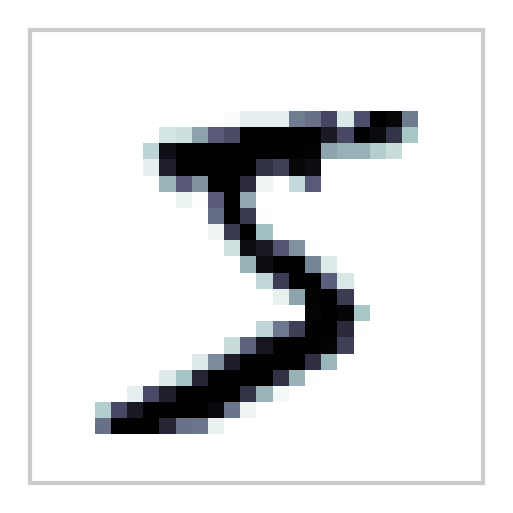

In [6]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

데이터를 float 타입으로 바꾸고 스케일링한다.

In [7]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


y 데이터는 One-Hot-Encoding 을 한다.

In [8]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## 신경망 구현 순서

Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. ``Sequential`` 모형 클래스 객체 생성
1. ``add`` 메서드로 layer 추가. 
   * ``Dense`` layer 가 가장 일반적인 신경망
   * 입력단부터 순차적으로 추가한다.
   * 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
   * 최초의 레이어는 ``input_dim`` 인수로 입력 크기를 설정해야 한다.
   * ``activation`` 인수로 activation 함수 설정
1. ``compile`` 메서드로 모형 완성. 
   * ``loss``인수로 Loss 함수 설정
   * ``optimizer`` 인수로 최적화 알고리즘 설정
   * ``metrics`` 인수로 트레이닝 단계에서 기록할 성능 기준 설정
1. ``fit`` 메서드로 트레이닝
   * ``nb_epoch`` 로 epoch 횟수 설정
   * ``batch_size`` 로 mini batch size 설정
   * ``metrics`` 인수로 설정한 성능 기준 기록을 출력으로 반환 
   * Jupyter Notebook을 사용할 때는 ``verbose=2``로 설정하여 progress bar 가 나오지 않도록 설정한다.

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

만들어진 모형은 ``model_to_dot`` 명령이나 `summary` 명령으로 모델 내부의 ``layers`` 리스트를 살펴봄으로써 내부 구조를 확인할 수 있다.

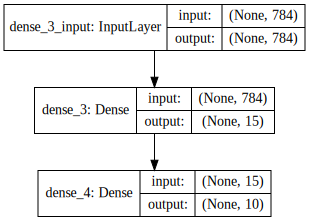

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [19]:
l1 = model.layers[0]
l2 = model.layers[1]

In [20]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_3', keras.layers.core.Dense, (None, 15), 'sigmoid', 11775)

In [21]:
l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_4', keras.layers.core.Dense, (None, 10), 'sigmoid', 160)

``fit`` 메서드로 트레이닝을 할 수 있다.

In [22]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 3s - loss: 0.1019 - acc: 0.2441 - val_loss: 0.0864 - val_acc: 0.3212
Epoch 2/30
 - 4s - loss: 0.0845 - acc: 0.3920 - val_loss: 0.0821 - val_acc: 0.4408
Epoch 3/30
 - 4s - loss: 0.0796 - acc: 0.4995 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/30
 - 4s - loss: 0.0740 - acc: 0.5619 - val_loss: 0.0708 - val_acc: 0.5851
Epoch 5/30
 - 5s - loss: 0.0682 - acc: 0.6146 - val_loss: 0.0649 - val_acc: 0.6521
Epoch 6/30
 - 5s - loss: 0.0625 - acc: 0.6758 - val_loss: 0.0594 - val_acc: 0.6999
Epoch 7/30
 - 6s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7317
Epoch 8/30
 - 5s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7486
Epoch 9/30
 - 6s - loss: 0.0505 - acc: 0.7473 - val_loss: 0.0486 - val_acc: 0.7637
Epoch 10/30
 - 5s - loss: 0.0478 - acc: 0.7607 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/30
 - 6s - loss: 0.0455 - acc: 0.7738 - val_loss: 0.0439 - val_acc: 0.7893
Epoch 12/30
 - 4s - loss: 0.0435 - 

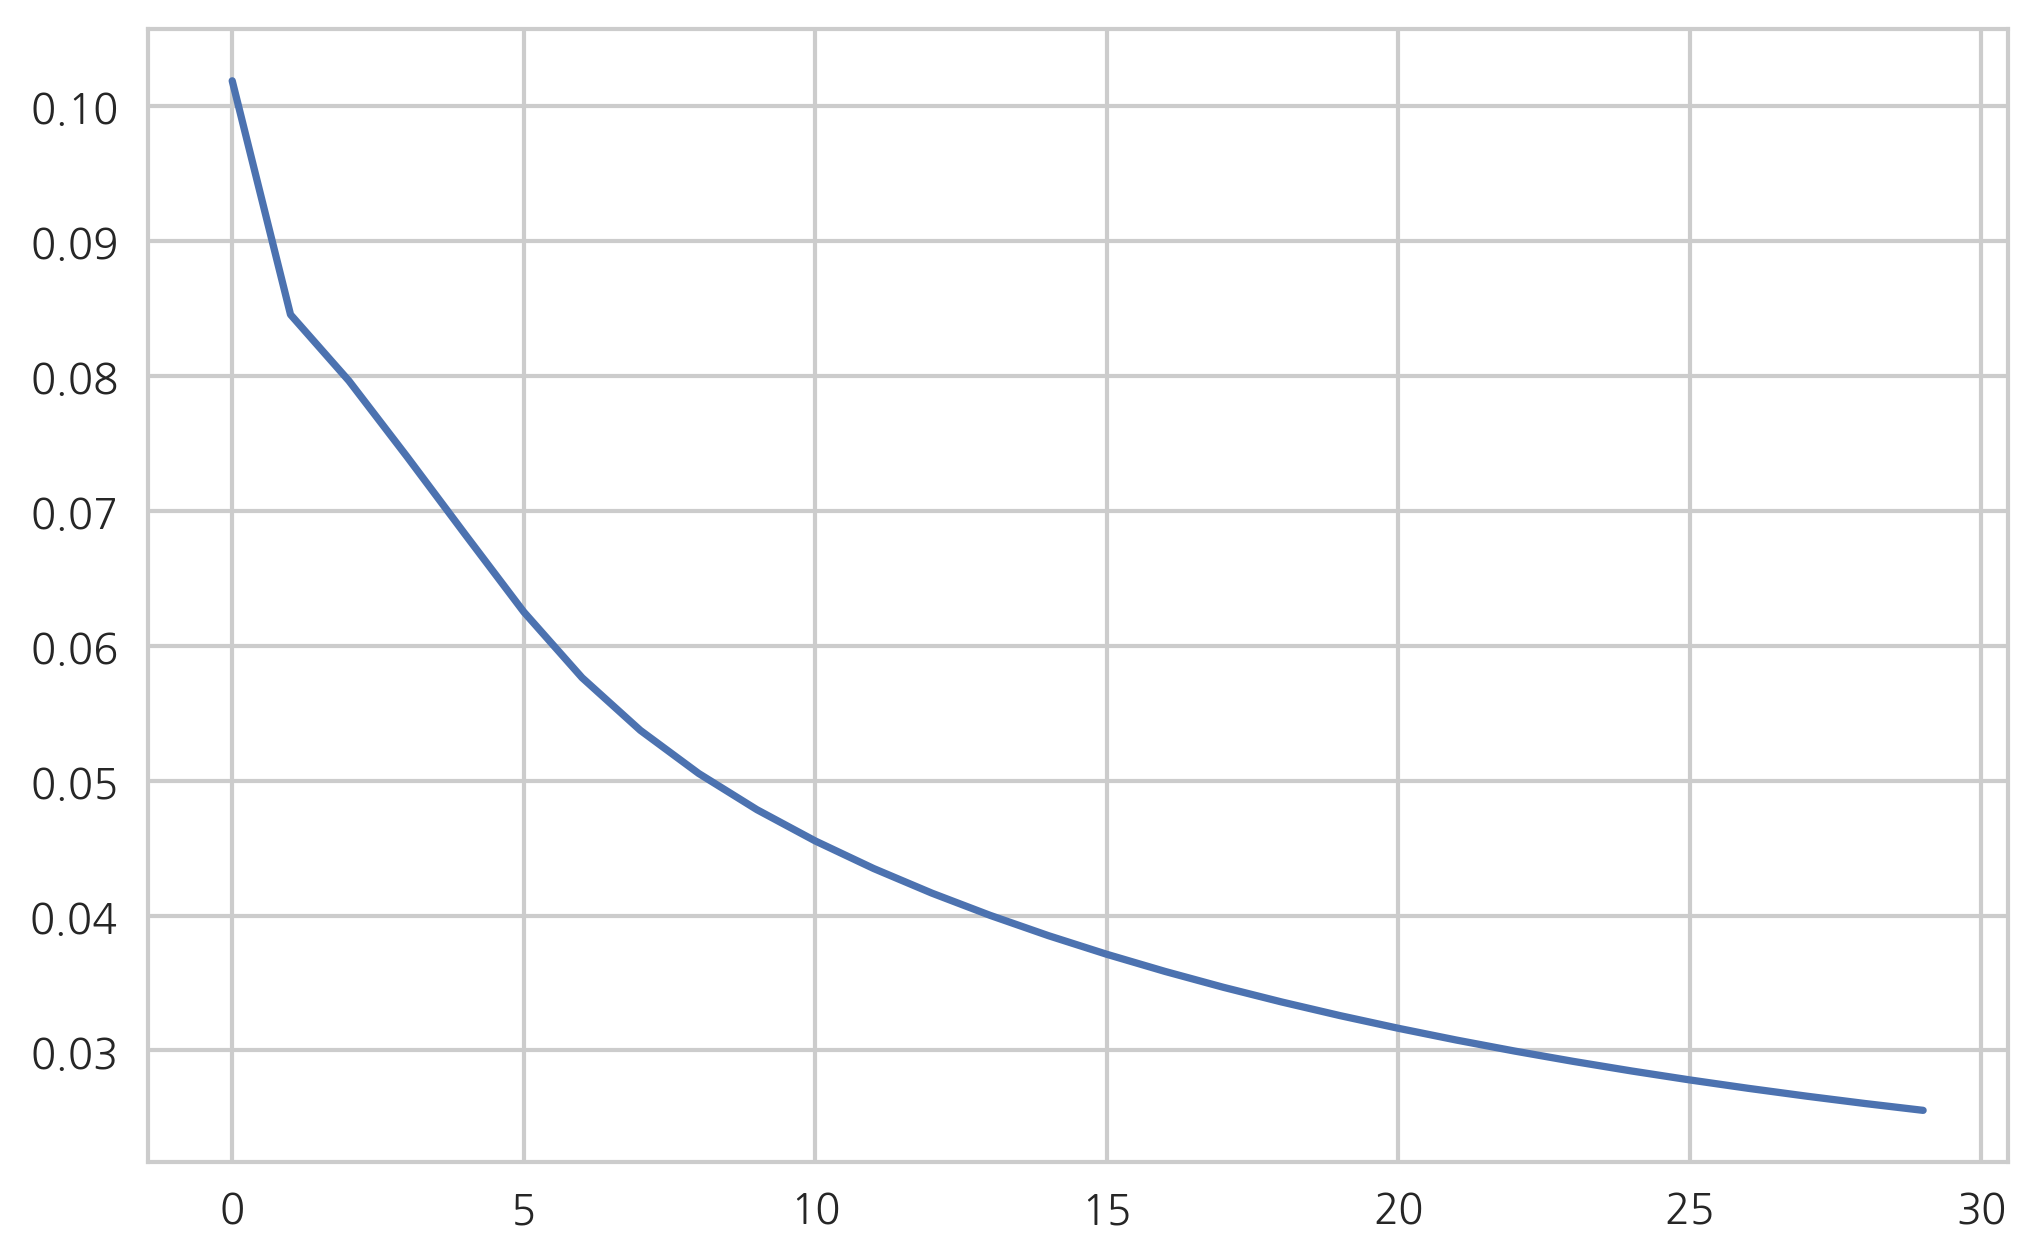

In [23]:
plt.plot(hist.history['loss'])
plt.show()

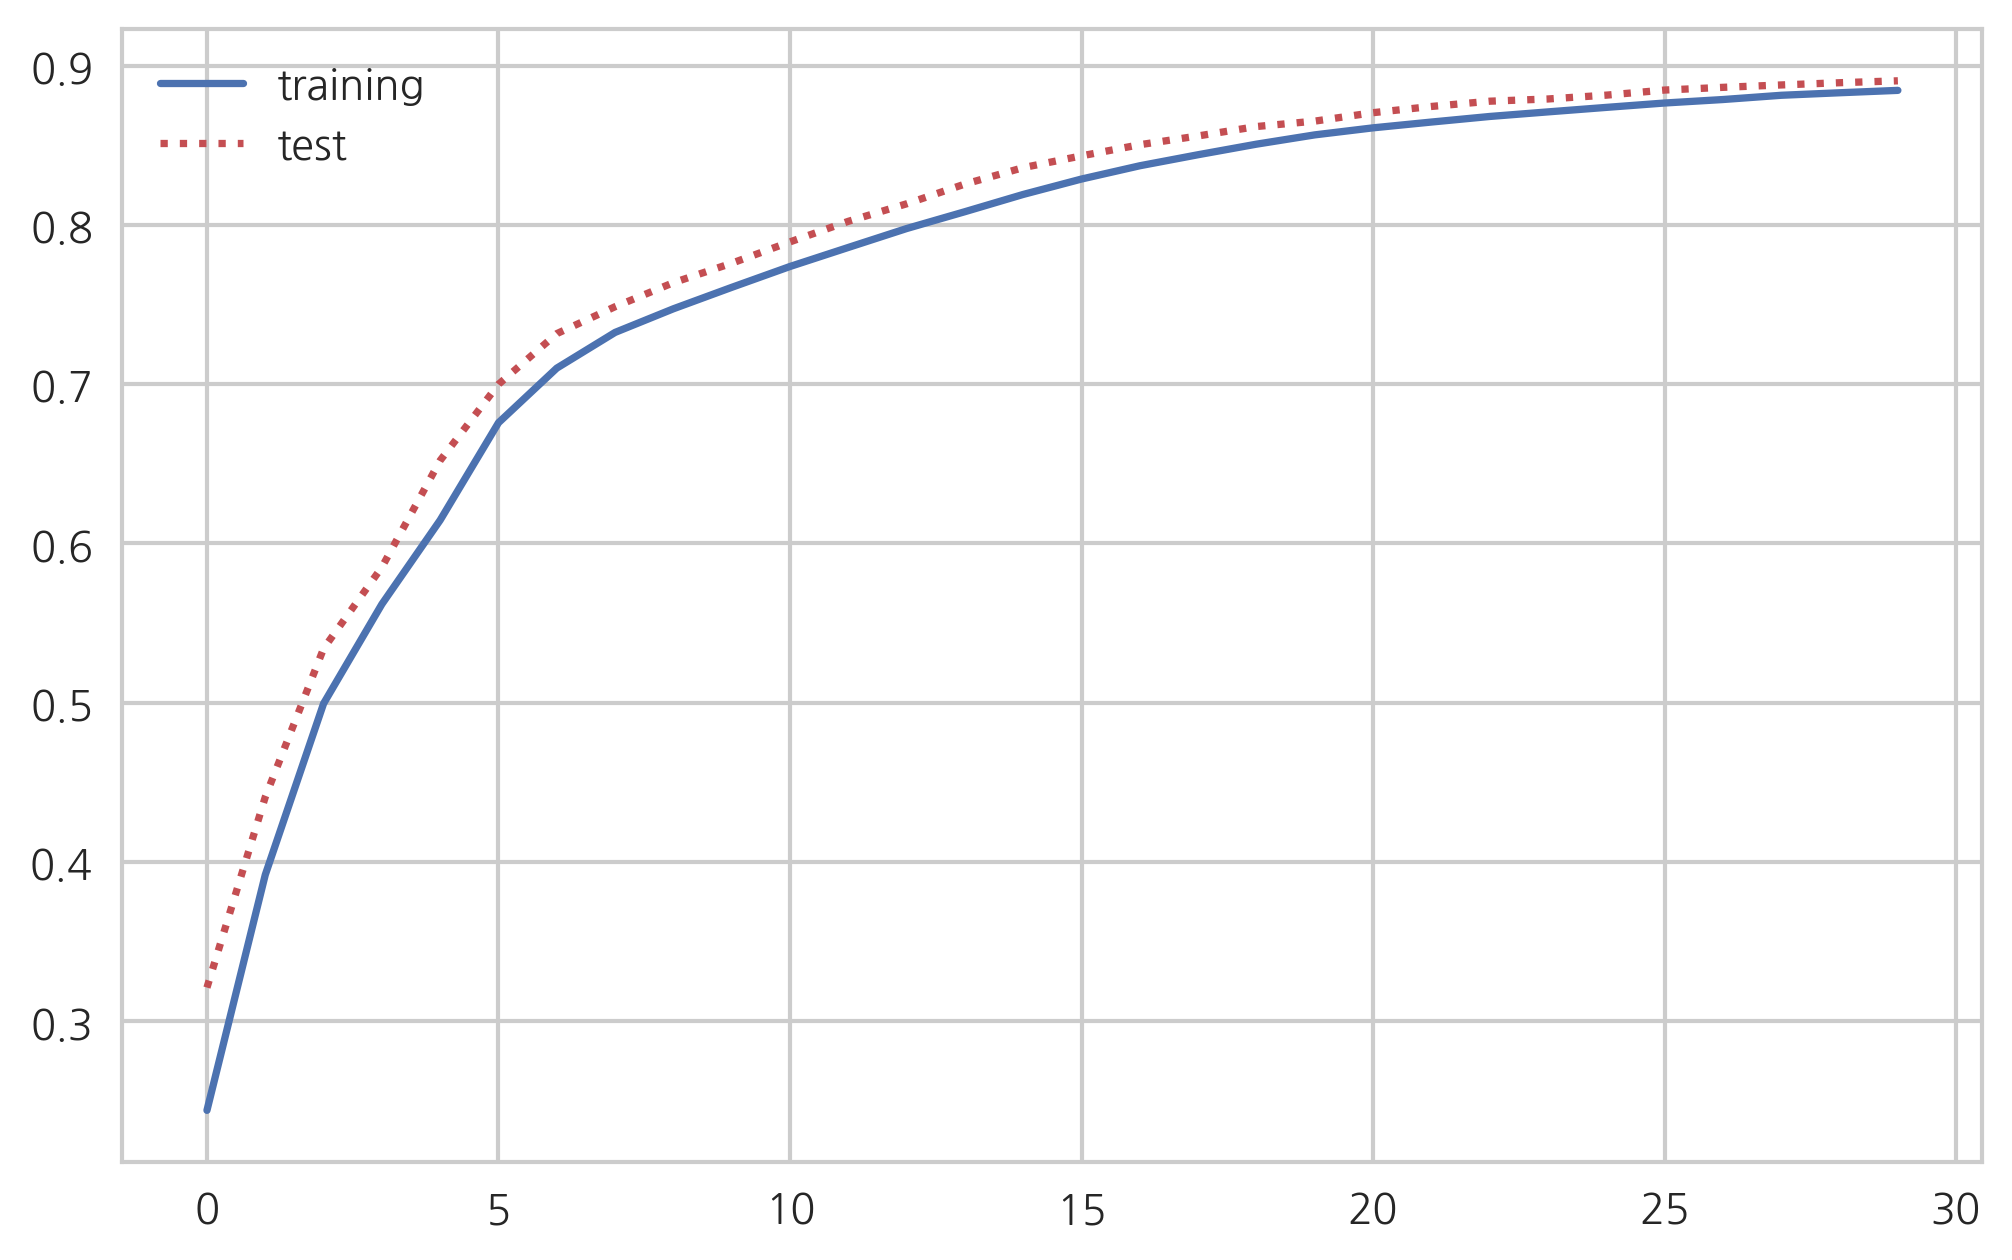

In [24]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

## 가중치 정보

트레이닝이 끝난 모형의 가중치 정보는 `get_weights` 메서드로 구할 수 있다. 이 메서드는 w 값과 b 값을 출력한다.

In [34]:
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [35]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

## 모형의 사용

트레이닝이 끝난 모형은 ``predict`` 메서드로 y 값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 ``predict_classes`` 메서드로 classification을 할 수 있다.

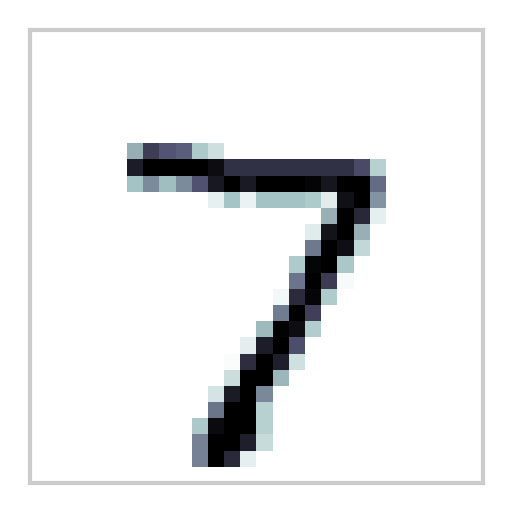

In [25]:
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [26]:
model.predict(X_test[:1, :])

array([[0.01765193, 0.01909655, 0.01319774, 0.02872419, 0.01252999,
        0.05718585, 0.01234618, 0.94183457, 0.0076269 , 0.05529964]],
      dtype=float32)

In [27]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

## 모형의 저장

트레이닝이 끝난 모형은 ``save`` 메서드로 가중치와 함께 hdf5 형식으로 저장하였다가 나중에 ``load`` 명령으로 불러 사용할 수 있다.

In [29]:
model.save('my_model.hdf5')
del model

In [30]:
from keras.models import load_model

model2 = load_model('my_model.hdf5')
model2.predict_classes(X_test[:1, :], verbose=0)

array([7])

#### 연습 문제 1

Keras를 사용하여 iris 분류 문제를 해결하는 신경망을 구현하라.

#### 연습 문제 2

Keras를 사용하여 olivetti_faces 분류 문제를 해결하는 신경망을 구현하라.